# Most High Risk Country

Find the most high risk country

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/covid-data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [4]:
# Group by country
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [5]:
# check out dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112660 entries, 0 to 112659
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   iso_code                         112660 non-null  object 
 1   continent                        107469 non-null  object 
 2   location                         112660 non-null  object 
 3   date                             112660 non-null  object 
 4   total_cases                      107645 non-null  float64
 5   new_cases                        107642 non-null  float64
 6   new_cases_smoothed               106627 non-null  float64
 7   total_deaths                     97105 non-null   float64
 8   new_deaths                       97260 non-null   float64
 9   new_deaths_smoothed              106627 non-null  float64
 10  total_cases_per_million          107076 non-null  float64
 11  new_cases_per_million            107073 non-null  float64
 12  ne

In [8]:
df['location'].value_counts()

Mexico                             606
Argentina                          606
Peru                               606
Thailand                           603
Taiwan                             591
                                  ... 
Niue                                50
Pitcairn                            49
Palau                                7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: location, Length: 233, dtype: int64

In [7]:
df['continent'].value_counts()

Africa           28760
Europe           26558
Asia             26430
North America    14216
South America     6680
Oceania           4825
Name: continent, dtype: int64

In [9]:
#summary of numeric data
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.076450e+05,107642.000000,106627.000000,9.710500e+04,97260.000000,106627.000000,107076.000000,107073.000000,106063.000000,96549.000000,96704.000000,106063.000000,90551.000000,100466.000000,100350.000000,103192.000000,50407.000000,91273.000000,106880.000000,100444.000000
mean,1.287368e+06,6346.362321,6347.264937,3.345767e+04,146.106837,132.385450,15839.642852,79.650358,79.557931,339.160355,1.529690,1.385333,1.010980,19273.265610,258.982878,7.972123,50.772220,3.024645,73.253047,0.726803
std,8.680111e+06,38992.853741,38500.828643,1.996246e+05,797.310436,743.655792,27798.009585,204.025337,159.912326,590.337479,3.904974,2.971170,0.350164,20038.763568,119.225251,4.206951,31.754908,2.454889,7.550812,0.150273
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,-75.911000,-10.844000,-0.010000,661.240000,79.370000,0.990000,1.188000,0.100000,53.280000,0.394000
25%,1.689000e+03,2.000000,8.429000,6.200000e+01,0.000000,0.000000,305.593000,0.249000,1.447000,9.231000,0.000000,0.000000,0.840000,4466.507000,168.711000,5.310000,19.351000,1.300000,67.920000,0.602000
50%,1.735400e+04,84.000000,104.714000,5.230000e+02,2.000000,1.571000,2335.394000,9.717000,13.127000,60.866000,0.141000,0.173000,1.020000,12951.839000,242.648000,7.110000,49.839000,2.400000,74.620000,0.744000
75%,1.852780e+05,881.000000,930.500000,4.636000e+03,18.000000,15.143000,17799.241250,75.911000,84.467000,395.663000,1.323000,1.287000,1.180000,27216.445000,329.942000,10.080000,82.502000,3.861000,78.740000,0.848000
max,2.159867e+08,905992.000000,826362.429000,4.494510e+06,17977.000000,14722.429000,199949.449000,18188.252000,4059.968000,5937.274000,215.334000,63.007000,5.910000,116935.600000,724.417000,30.530000,100.000000,13.800000,86.750000,0.957000


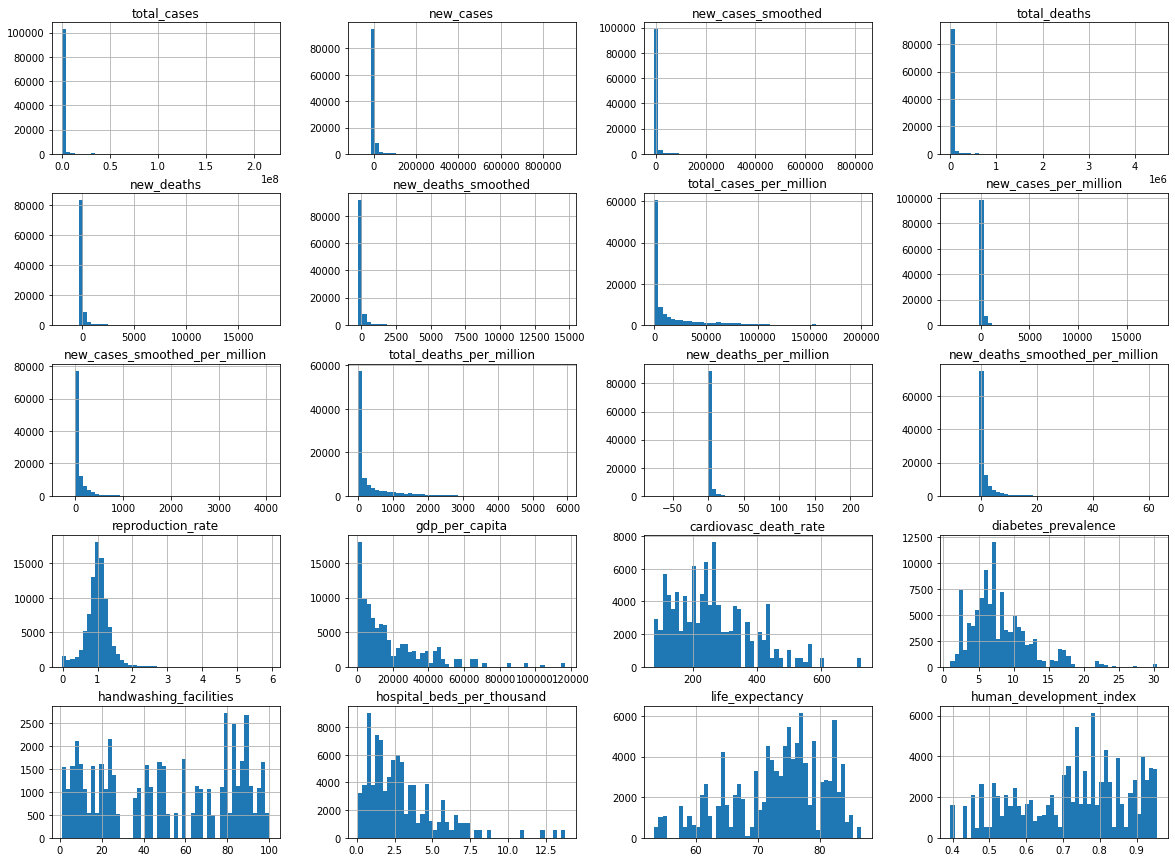

In [10]:
# plot histogram
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
# split data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)


In [ ]:
# Next steps: consider stratified sampling to maintain a well distributed sample
# take notes on the columns to better understand the data and what the values represent
